# STATS 765, Lab 03
## Task 1: Generate Data
### Step 1.1

In [1]:
set.seed(686249907) # replace "765" with your student ID.
n <- 200
x <- rnorm(n)
residual_std <- exp(x) # error standard deviation is exponential w.r.t. x values, 
y <- 1.5+3*x + residual_std*rnorm(n)

### Step 1.2

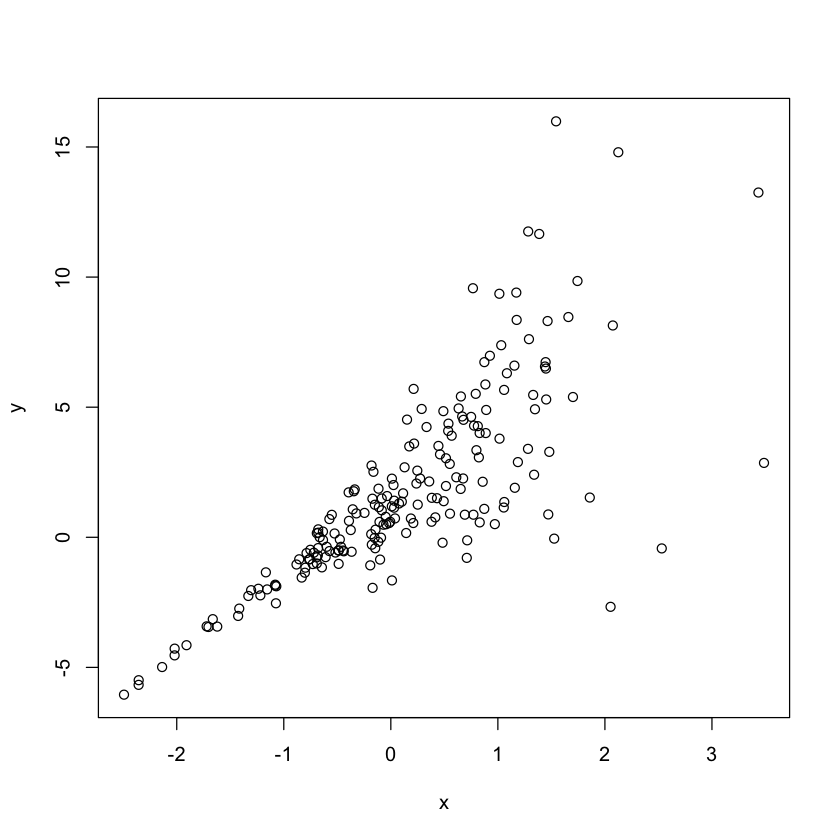

In [2]:
plot(x, y)

x and y are positively correlated in a very consistently linear way for negative values of x. Variance increases as x values move in a positive direction. The data are heteroscedastic.

## Task 2: Fit

### Step 2.1

In [3]:
fit = lm(y~x)
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.7239 -0.7530 -0.1023  0.8705 10.3435 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.3691     0.1636   8.367 1.05e-14 ***
x             2.7682     0.1621  17.073  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.295 on 198 degrees of freedom
Multiple R-squared:  0.5955,	Adjusted R-squared:  0.5934 
F-statistic: 291.5 on 1 and 198 DF,  p-value: < 2.2e-16


In [4]:
# the summary output does not show the actual p-value, which causes problems with later comparison
coef = coef(summary(fit))
p = coef["x", "Pr(>|t|)"]

cat("Actual P-value:", p)

Actual P-value: 8.915736e-41

### Step 2.2

In [5]:
std_err_x = coef["x", "Std. Error"]

cat("Std Error of X:", std_err_x)

Std Error of X: 0.1621384

In [6]:
beta_hat_x = coef["x", "Estimate"]
confidence = qnorm(0.975) # 1.96
lower_bound = beta_hat_x - confidence*std_err_x
upper_bound = beta_hat_x + confidence*std_err_x

cat("95% confidence interval of beta-hat-x: (", lower_bound, ", ", upper_bound,")", sep="")

95% confidence interval of beta-hat-x: (2.450373, 3.085944)

The extremely tiny p-value `8.915736e-41` strongly suggests that there is a relationship between x and y. Part of the extreme confidence in that number, however, is based on the incorrect assumption that our data is homoscedastic.

## Task 3: Sandwich Estimator

### Step 3.1

In [7]:
library(sandwich)
se_beta_hat = sqrt(diag(vcovHC(fit)))

se_beta_hat

(Intercept)           x 
  0.1371934   0.2665696

### Step 3.2

In [8]:
sandwich_std_err_x = se_beta_hat["x"]

confidence = qnorm(0.975) # 1.96
lower_bound = beta_hat_x - confidence*sandwich_std_err_x
upper_bound = beta_hat_x + confidence*sandwich_std_err_x

cat("95% confidence interval of beta-x: (", lower_bound, ", ", upper_bound,")", sep="")

95% confidence interval of beta-x: (2.245692, 3.290625)

In [9]:
z = beta_hat_x / sandwich_std_err_x
p = 2*pnorm(z, lower.tail=F)

cat("New SE P-value:", p)

New SE P-value: 2.92074e-25

## Task 4: Comparison and Comment

The p-value increases from `8.915736e-41` to `2.92074e-25` when the more accurate sandwich estimate of standard error is used. The change in p-value does not ultimately impact our rejection of the null hypothesis, since our revised p-value of `2.92074e-25` is still extremely small. However, the relationship between the two p-values is roughly exponential, and suggests that inferences about other datasets may be more severely impacted by this type of misunderstanding. Our inferences about statistical significance and confidence intervals depended greatly on baseline assumptions about the data. Our data are not homoscedastic, so we should not assume that a simple linear model will lead us to reliable conclusions. The sandwich estimator better captures the changing degree of variance in the data, and leads us to be a bit less confident in the precision of our model.

### EOF